In [1]:
# 3.0 — Setup (train-only EDA)
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- Load saved TRAIN split ----------
DATA_DIR = Path("../data")
X_train = pd.read_csv(DATA_DIR / "X_train.csv")
y_train = pd.read_csv(DATA_DIR / "y_train.csv").squeeze("columns")

# Combine into one train-only dataframe
df_tr = pd.concat([X_train, y_train.rename("Churn")], axis=1)

# ---------- Declare feature types ----------
categorical_features = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]
numerical_features = ['tenure','MonthlyCharges','TotalCharges']

# ---------- Make an EDA-only copy ----------
eda_df = df_tr.copy()

# Collapse verbose service categories (for clearer plots only)
service_cols = [
    'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]
replace_map = {"No internet service": "No", "No phone service": "No"}
for c in service_cols:
    if c in eda_df.columns:
        eda_df[c] = eda_df[c].replace(replace_map)

# Ensure target is int for groupby math
eda_df['Churn'] = eda_df['Churn'].astype(int)

# ---------- Sanity checks ----------
print("df_tr shape:", df_tr.shape)      # e.g. (5625, 20) → 19 features + Churn
print("Columns:", list(df_tr.columns))
baseline = eda_df['Churn'].mean()
print(f"Baseline churn rate (train): {baseline:.3f}")  # ≈ 0.266 expected


df_tr shape: (5625, 20)
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Baseline churn rate (train): 0.266


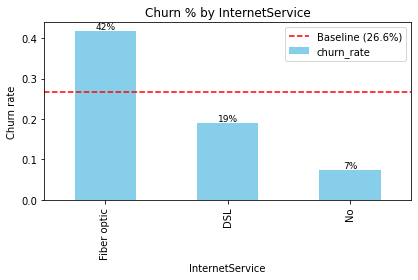

                 count  churn_rate
InternetService                   
Fiber optic       2483       0.418
DSL               1934       0.190
No                1208       0.074


In [18]:
from pathlib import Path
import matplotlib.pyplot as plt

# Make sure save folders exist
Path("../reports/figures").mkdir(parents=True, exist_ok=True)
Path("../reports/tables").mkdir(parents=True, exist_ok=True)

# Function to calculate churn % by a categorical feature
def churn_table(df, col, target='Churn'):
    g = df.groupby(col)[target].agg(['count','mean']).rename(columns={'mean':'churn_rate'})
    g['churn_rate'] = g['churn_rate'].round(3)  # keep 3 decimals
    return g.sort_values('churn_rate', ascending=False)

# Function to plot churn % by category and save
def plot_churn_bar(df, col, save=False):
    tbl = churn_table(df, col)
    ax = tbl['churn_rate'].plot(kind='bar', figsize=(6,4), color='skyblue')
    
    # Add baseline line
    baseline = df['Churn'].mean()
    ax.axhline(baseline, linestyle='--', color='red', label=f'Baseline ({baseline:.1%})')
    
    # Add % labels on bars
    for p, v in zip(ax.patches, tbl['churn_rate']):
        ax.annotate(f"{v:.0%}", (p.get_x() + p.get_width()/2, v),
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel('Churn rate')
    ax.set_title(f'Churn % by {col}')
    ax.legend()
    plt.tight_layout()
    
    # Save plot if requested
    if save:
        plt.savefig(f"../reports/figures/churn_by_{col}.png", dpi=150)
    
    plt.show()
    return tbl

# Run for InternetService and save results
internet_tbl = plot_churn_bar(eda_df, 'InternetService', save=True)
print(internet_tbl)

# Save churn table as CSV
internet_tbl.to_csv("../reports/tables/churn_by_InternetService.csv")


In [4]:
#  Plot

# Red dashed line = baseline churn (26.6%).

# Bars show churn % per internet type.

# Labels (42%, 19%, 7%) make the difference clear.

# 🔹 Interpretation

# Fiber optic customers churn way above baseline (42% vs 26.6%). → High-risk group.

# DSL customers churn below baseline (19% vs 26.6%). → Medium risk.

# No internet service customers rarely churn (7%). → Very low risk.

# 🔹 Business takeaway

# Fiber optic users are most dissatisfied or paying the highest bills.

# DSL is more stable, churn is moderate.

# Customers with no internet service are “sticky” (they’re not going anywhere).


=== gender ===


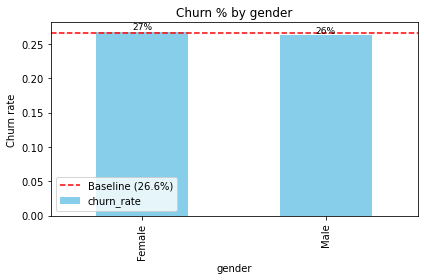

        count  churn_rate
gender                   
Female   2802       0.268
Male     2823       0.263 


=== SeniorCitizen ===


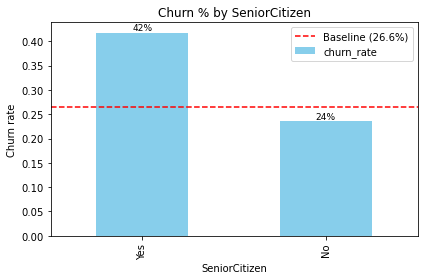

               count  churn_rate
SeniorCitizen                   
Yes              910       0.418
No              4715       0.236 


=== Partner ===


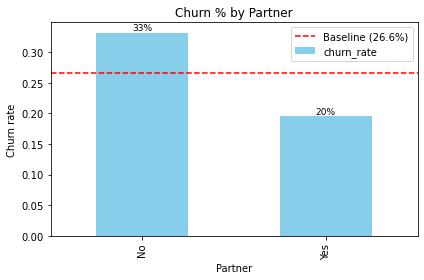

         count  churn_rate
Partner                   
No        2891       0.332
Yes       2734       0.196 


=== Dependents ===


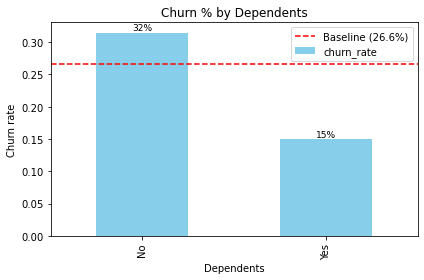

            count  churn_rate
Dependents                   
No           3940       0.315
Yes          1685       0.150 


=== PhoneService ===


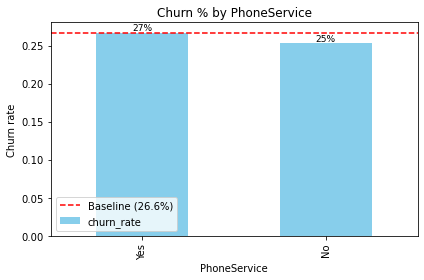

              count  churn_rate
PhoneService                   
Yes            5080       0.267
No              545       0.253 


=== MultipleLines ===


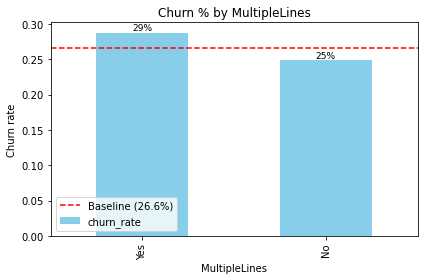

               count  churn_rate
MultipleLines                   
Yes             2385       0.288
No              3240       0.249 


=== InternetService ===


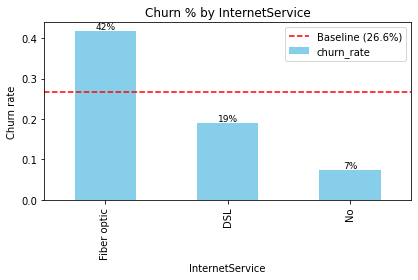

                 count  churn_rate
InternetService                   
Fiber optic       2483       0.418
DSL               1934       0.190
No                1208       0.074 


=== OnlineSecurity ===


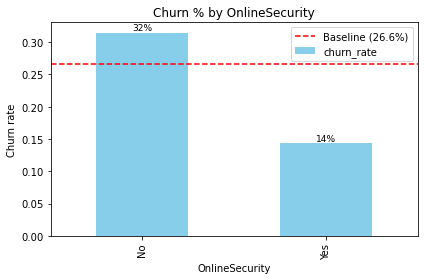

                count  churn_rate
OnlineSecurity                   
No               4011       0.315
Yes              1614       0.144 


=== OnlineBackup ===


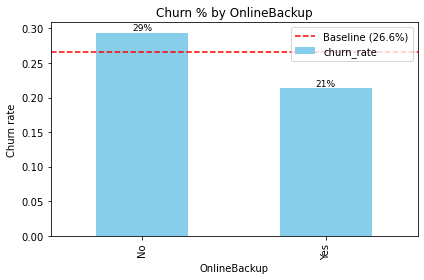

              count  churn_rate
OnlineBackup                   
No             3654       0.294
Yes            1971       0.214 


=== DeviceProtection ===


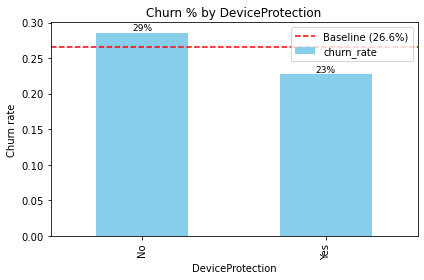

                  count  churn_rate
DeviceProtection                   
No                 3681       0.286
Yes                1944       0.227 


=== TechSupport ===


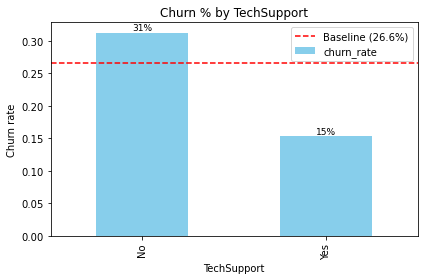

             count  churn_rate
TechSupport                   
No            3967       0.313
Yes           1658       0.153 


=== StreamingTV ===


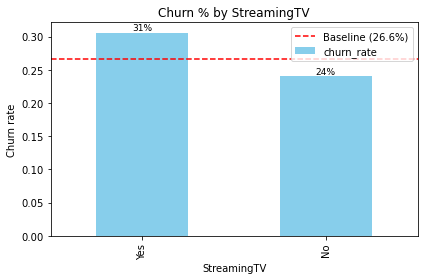

             count  churn_rate
StreamingTV                   
Yes           2188       0.306
No            3437       0.240 


=== StreamingMovies ===


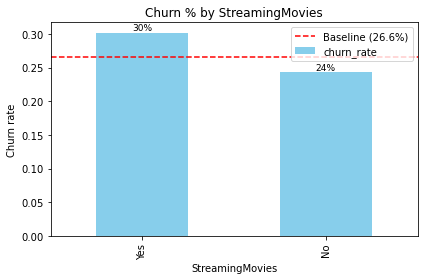

                 count  churn_rate
StreamingMovies                   
Yes               2195       0.302
No                3430       0.243 


=== Contract ===


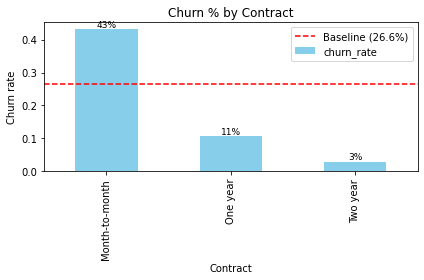

                count  churn_rate
Contract                         
Month-to-month   3085       0.431
One year         1182       0.107
Two year         1358       0.029 


=== PaperlessBilling ===


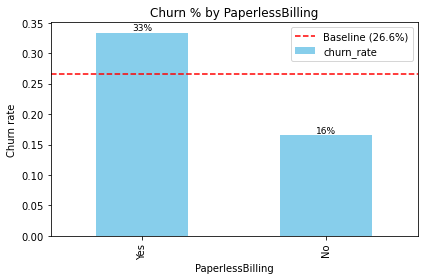

                  count  churn_rate
PaperlessBilling                   
Yes                3349       0.334
No                 2276       0.165 


=== PaymentMethod ===


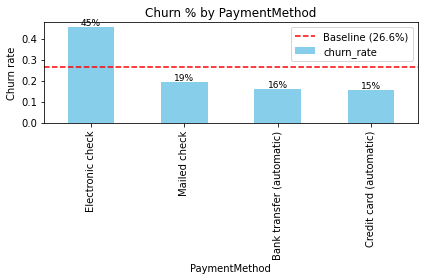

                           count  churn_rate
PaymentMethod                               
Electronic check            1907       0.454
Mailed check                1268       0.192
Bank transfer (automatic)   1235       0.160
Credit card (automatic)     1215       0.154 



In [19]:
from pathlib import Path
import matplotlib.pyplot as plt

# Make sure save folders exist
Path("../reports/figures").mkdir(parents=True, exist_ok=True)
Path("../reports/tables").mkdir(parents=True, exist_ok=True)

# Function to calculate churn % by a categorical feature
def churn_table(df, col, target='Churn'):
    g = df.groupby(col)[target].agg(['count','mean']).rename(columns={'mean':'churn_rate'})
    g['churn_rate'] = g['churn_rate'].round(3)
    return g.sort_values('churn_rate', ascending=False)

# Function to plot churn % by category and save
def plot_churn_bar(df, col, baseline=None, save=False):
    tbl = churn_table(df, col)
    ax = tbl['churn_rate'].plot(kind='bar', figsize=(6,4), color='skyblue')
    
    # Add baseline line
    if baseline is not None:
        ax.axhline(baseline, linestyle='--', color='red', label=f'Baseline ({baseline:.1%})')
    
    # Add % labels on bars
    for p, v in zip(ax.patches, tbl['churn_rate']):
        ax.annotate(f"{v:.0%}", (p.get_x() + p.get_width()/2, v),
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel('Churn rate')
    ax.set_title(f'Churn % by {col}')
    if baseline is not None:
        ax.legend()
    plt.tight_layout()
    
    # Save plot if requested
    if save:
        plt.savefig(f"../reports/figures/churn_by_{col}.png", dpi=150)
    
    plt.show()
    return tbl

# Run for all categorical features and save results
baseline = eda_df['Churn'].mean()
cat_results = {}

for c in categorical_features:
    print(f"\n=== {c} ===")
    tbl = plot_churn_bar(eda_df, c, baseline=baseline, save=True)  # save plot
    print(tbl, "\n")
    tbl.to_csv(f"../reports/tables/churn_by_{c}.csv")  # save table
    cat_results[c] = tbl


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import chi2_contingency

# Make sure save folders exist
Path("../reports/figures").mkdir(parents=True, exist_ok=True)
Path("../reports/tables").mkdir(parents=True, exist_ok=True)

# Helper function to save DataFrame as image
def save_df_as_image(df, filename, title=""):
    fig, ax = plt.subplots(figsize=(8, 0.5*len(df)+1))  # height auto-scales with rows
    ax.axis('off')
    tbl = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1, 1.2)  # widen rows for readability
    plt.title(title, fontsize=12, pad=15)
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.close()

baseline = eda_df['Churn'].mean()

# ---------------- High-risk summary ----------------
summary_rows = []
for c in categorical_features:
    tbl = churn_table(eda_df, c)
    top_cat = tbl['churn_rate'].idxmax()
    top_rate = tbl['churn_rate'].max()
    lift = top_rate / baseline
    summary_rows.append({
        'Feature': c,
        'High-risk Category': top_cat,
        'Churn Rate': f"{top_rate:.1%}",
        'Lift vs Baseline': f"{lift:.2f}x"
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by='Churn Rate', ascending=False)
print("\n=== High-risk Summary ===")
print(summary_df)

summary_df.to_csv("../reports/tables/high_risk_summary.csv", index=False)
save_df_as_image(summary_df, "../reports/figures/high_risk_summary.png", "High-risk Summary")

# ---------------- Low-risk summary ----------------
lowrisk_rows = []
for c in categorical_features:
    tbl = churn_table(eda_df, c)
    low_cat = tbl['churn_rate'].idxmin()
    low_rate = tbl['churn_rate'].min()
    lift = low_rate / baseline
    lowrisk_rows.append({
        'Feature': c,
        'Low-risk Category': low_cat,
        'Churn Rate': f"{low_rate:.1%}",
        'Lift vs Baseline': f"{lift:.2f}x"
    })

lowrisk_df = pd.DataFrame(lowrisk_rows).sort_values(by='Churn Rate')
print("\n=== Low-risk Summary ===")
print(lowrisk_df)

lowrisk_df.to_csv("../reports/tables/low_risk_summary.csv", index=False)
save_df_as_image(lowrisk_df, "../reports/figures/low_risk_summary.png", "Low-risk Summary")

# ---------------- Chi-square tests ----------------
chi_results = []
for c in categorical_features:
    ct = pd.crosstab(eda_df[c], eda_df['Churn'])
    chi2, p, dof, ex = chi2_contingency(ct)
    chi_results.append({
        'Feature': c,
        'p-value': f"{p:.2e}"
    })

chi_df = pd.DataFrame(chi_results).sort_values('p-value')
print("\n=== Chi-square Results ===")
print(chi_df)

chi_df.to_csv("../reports/tables/chi_square_results.csv", index=False)
save_df_as_image(chi_df, "../reports/figures/chi_square_results.png", "Chi-square Results")



=== High-risk Summary ===
             Feature High-risk Category Churn Rate Lift vs Baseline
15     PaymentMethod   Electronic check      45.4%            1.71x
13          Contract     Month-to-month      43.1%            1.62x
1      SeniorCitizen                Yes      41.8%            1.57x
6    InternetService        Fiber optic      41.8%            1.57x
14  PaperlessBilling                Yes      33.4%            1.26x
2            Partner                 No      33.2%            1.25x
3         Dependents                 No      31.5%            1.19x
7     OnlineSecurity                 No      31.5%            1.19x
10       TechSupport                 No      31.3%            1.18x
11       StreamingTV                Yes      30.6%            1.15x
12   StreamingMovies                Yes      30.2%            1.14x
8       OnlineBackup                 No      29.4%            1.11x
5      MultipleLines                Yes      28.8%            1.08x
9   DeviceProtection 

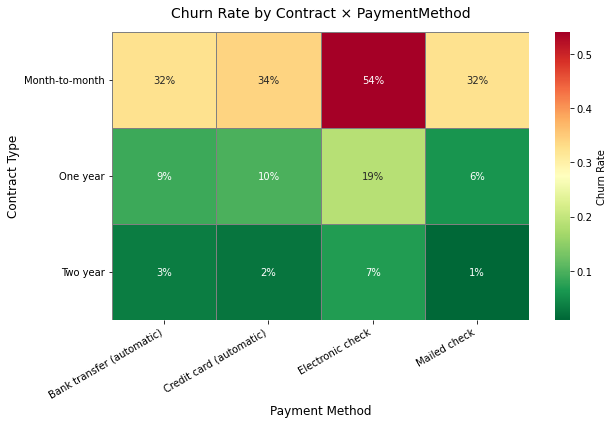


Contract × PaymentMethod — Interaction Summary
🔴 Highest churn: Month-to-month + Electronic check → 54%
🟢 Lowest churn: Two year + Mailed check → 1%


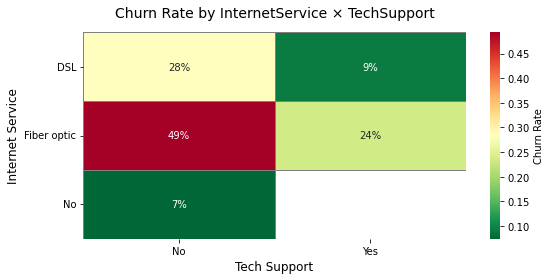


InternetService × TechSupport — Interaction Summary
🔴 Highest churn: Fiber optic + No → 49%
🟢 Lowest churn: No + No → 7%


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Make sure save folders exist
Path("../reports/figures").mkdir(parents=True, exist_ok=True)
Path("../reports/tables").mkdir(parents=True, exist_ok=True)

def describe_interaction(pivot, name):
    """Generate quick summary for high-risk and low-risk groups"""
    max_val = pivot.max().max()
    min_val = pivot.min().min()
    
    # Find where these values occur
    max_pos = pivot.stack().idxmax()
    min_pos = pivot.stack().idxmin()
    
    print(f"\n{name} — Interaction Summary")
    print(f"🔴 Highest churn: {max_pos[0]} + {max_pos[1]} → {max_val:.0%}")
    print(f"🟢 Lowest churn: {min_pos[0]} + {min_pos[1]} → {min_val:.0%}")

# ---------------- Contract × PaymentMethod ----------------
pivot1 = pd.crosstab(
    eda_df['Contract'],
    eda_df['PaymentMethod'],
    values=eda_df['Churn'],
    aggfunc='mean'
).round(3)

plt.figure(figsize=(9,6))
sns.heatmap(
    pivot1, annot=True, fmt=".0%", cmap="RdYlGn_r",
    cbar_kws={'label': 'Churn Rate'}, linewidths=0.5, linecolor='gray'
)
plt.title("Churn Rate by Contract × PaymentMethod", fontsize=14, pad=15)
plt.ylabel("Contract Type", fontsize=12)
plt.xlabel("Payment Method", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/figures/churn_contract_payment.png", dpi=150)
plt.show()

# Save pivot table
pivot1.to_csv("../reports/tables/churn_contract_payment.csv")

# Auto-generate description
describe_interaction(pivot1, "Contract × PaymentMethod")

# ---------------- InternetService × TechSupport ----------------
pivot2 = pd.crosstab(
    eda_df['InternetService'],
    eda_df['TechSupport'],
    values=eda_df['Churn'],
    aggfunc='mean'
).round(3)

plt.figure(figsize=(8,4))
sns.heatmap(
    pivot2, annot=True, fmt=".0%", cmap="RdYlGn_r",
    cbar_kws={'label': 'Churn Rate'}, linewidths=0.5, linecolor='gray'
)
plt.title("Churn Rate by InternetService × TechSupport", fontsize=14, pad=15)
plt.ylabel("Internet Service", fontsize=12)
plt.xlabel("Tech Support", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/figures/churn_internet_techsupport.png", dpi=150)
plt.show()

# Save pivot table
pivot2.to_csv("../reports/tables/churn_internet_techsupport.csv")

# Auto-generate description
describe_interaction(pivot2, "InternetService × TechSupport")


In [16]:
# Export churn tables
from pathlib import Path

# Make sure the reports/tables folder exists
Path("../reports/tables").mkdir(parents=True, exist_ok=True)


for c, tbl in cat_results.items():
    tbl.to_csv(f"../reports/tables/churn_by_{c}.csv")

# Export chi-square results
chi_df.to_csv("../reports/tables/chi_square_results.csv", index=False)

# Export interaction pivots
pivot1.to_csv("../reports/tables/churn_pivot_contract_payment.csv")
pivot2.to_csv("../reports/tables/churn_pivot_internet_tech.csv")

print("All tables exported to ../reports/tables/")


All tables exported to ../reports/tables/


In [17]:
from pathlib import Path

# Make sure the folder exists
Path("../reports/figures").mkdir(parents=True, exist_ok=True)



=== tenure ===


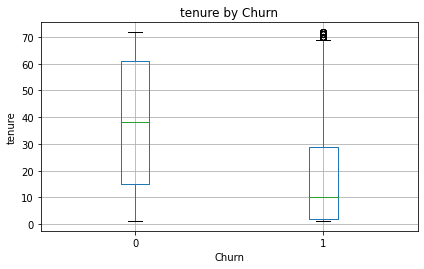


Summary stats:
        count   mean  median    std  min  max
Churn                                       
0       4130  37.76    38.0  24.04    1   72
1       1495  18.22    10.0  19.73    1   72

Churn by bins:
          tenure  churn_rate
0  (0.999, 6.0]       0.536
1   (6.0, 20.0]       0.338
2  (20.0, 40.0]       0.215
3  (40.0, 61.0]       0.159
4  (61.0, 72.0]       0.068

Mann–Whitney U test for tenure: p-value = 2.733e-167
🔴 Highest churn for tenure: (0.999, 6.0] → 54%
🟢 Lowest churn for tenure: (61.0, 72.0] → 7%

=== MonthlyCharges ===


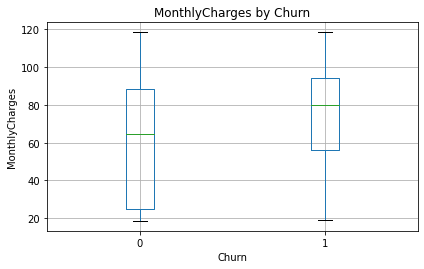


Summary stats:
        count   mean  median    std   min     max
Churn                                           
0       4130  61.50   64.68  31.09  18.4  118.65
1       1495  74.68   79.90  24.77  19.0  118.35

Churn by bins:
                MonthlyCharges  churn_rate
0  (18.398999999999997, 25.1]       0.092
1               (25.1, 59.08]       0.254
2               (59.08, 79.3]       0.290
3               (79.3, 94.46]       0.368
4             (94.46, 118.65]       0.328

Mann–Whitney U test for MonthlyCharges: p-value = 7.079e-44
🔴 Highest churn for MonthlyCharges: (79.3, 94.46] → 37%
🟢 Lowest churn for MonthlyCharges: (18.398999999999997, 25.1] → 9%

=== TotalCharges ===


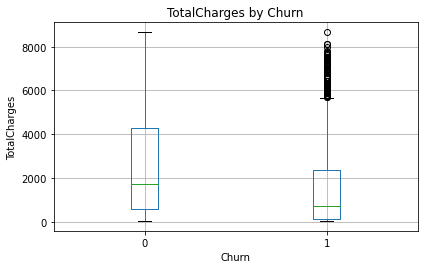


Summary stats:
        count     mean   median      std   min     max
Churn                                                
0       4130  2572.88  1709.12  2335.05  18.8  8670.1
1       1495  1553.07   712.85  1913.09  19.1  8684.8

Churn by bins:
         TotalCharges  churn_rate
0    (18.799, 273.2]       0.459
1    (273.2, 958.13]       0.292
2  (958.13, 2088.59]       0.207
3  (2088.59, 4517.7]       0.229
4   (4517.7, 8684.8]       0.141

Mann–Whitney U test for TotalCharges: p-value = 3.012e-67
🔴 Highest churn for TotalCharges: (18.799, 273.2] → 46%
🟢 Lowest churn for TotalCharges: (4517.7, 8684.8] → 14%


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import mannwhitneyu

# Make sure save folders exist
Path("../reports/figures").mkdir(parents=True, exist_ok=True)
Path("../reports/tables").mkdir(parents=True, exist_ok=True)

# ---------------- Helper functions ----------------
def num_summary(df, num_col):
    """Summary stats of numerical feature split by churn"""
    g = df.groupby('Churn')[num_col].agg(['count','mean','median','std','min','max']).round(2)
    return g

def plot_num_by_churn(df, num_col, save=False):
    """Boxplot of numerical feature vs churn + save"""
    fig, ax = plt.subplots(figsize=(6,4))
    df.boxplot(column=num_col, by='Churn', ax=ax)
    plt.suptitle("")  # remove default title
    ax.set_title(f'{num_col} by Churn')
    ax.set_xlabel('Churn')
    ax.set_ylabel(num_col)
    plt.tight_layout()
    
    if save:
        plt.savefig(f"../reports/figures/{num_col}_by_churn_box.png", dpi=150)
    plt.show()
    
    return num_summary(df, num_col)

def churn_by_bins(df, num_col, q=5, save=False):
    """Bin numerical feature into quantiles and calculate churn rate per bin"""
    bins = pd.qcut(df[num_col], q=q, duplicates='drop')
    tbl = df.groupby(bins)['Churn'].mean().reset_index()
    tbl.columns = [num_col, 'churn_rate']
    tbl['churn_rate'] = tbl['churn_rate'].round(3)
    
    # Convert Interval objects to string for saving
    tbl[num_col] = tbl[num_col].astype(str)
    
    if save:
        tbl.to_csv(f"../reports/tables/churn_by_bins_{num_col}.csv", index=False)
    return tbl

def describe_numeric_bins(bin_tbl, col_name):
    """Prints a short summary of highest and lowest churn bins"""
    max_row = bin_tbl.loc[bin_tbl['churn_rate'].idxmax()]
    min_row = bin_tbl.loc[bin_tbl['churn_rate'].idxmin()]
    print(f"🔴 Highest churn for {col_name}: {max_row[col_name]} → {max_row['churn_rate']:.0%}")
    print(f"🟢 Lowest churn for {col_name}: {min_row[col_name]} → {min_row['churn_rate']:.0%}")

# ---------------- Run Numerical EDA ----------------
num_results = {}
baseline = eda_df['Churn'].mean()

for n in numerical_features:
    print(f"\n=== {n} ===")
    
    # 1. Boxplot + summary stats
    stats = plot_num_by_churn(eda_df, n, save=True)
    print("\nSummary stats:\n", stats)
    stats.to_csv(f"../reports/tables/num_summary_{n}.csv")
    
    # 2. Churn % by bins
    bin_tbl = churn_by_bins(eda_df, n, q=5, save=True)
    print("\nChurn by bins:\n", bin_tbl)
    
    # 3. Mann–Whitney U test
    churned = eda_df.loc[eda_df.Churn==1, n]
    not_churned = eda_df.loc[eda_df.Churn==0, n]
    stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')
    print(f"\nMann–Whitney U test for {n}: p-value = {p:.3e}")
    
    # 4. Auto-description
    describe_numeric_bins(bin_tbl, n)
    
    # Save results
    num_results[n] = {"stats": stats, "bins": bin_tbl, "p-value": p}


In [27]:
import matplotlib.pyplot as plt

def save_df_as_image(df, filename, title=""):
    """Save a DataFrame as a PNG image with matplotlib"""
    fig, ax = plt.subplots(figsize=(8, 0.5*len(df)+1))  # auto-scale height
    ax.axis('off')
    tbl = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(9)
    tbl.scale(1, 1.2)  # adjust row height
    plt.title(title, fontsize=12, pad=15)
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.close()

# Generate styled tables for each numeric feature
for n in numerical_features:
    # Reload the bin table (already saved earlier as CSV)
    bin_tbl = pd.read_csv(f"../reports/tables/churn_by_bins_{n}.csv")
    
    # Save as PNG image
    save_df_as_image(bin_tbl, f"../reports/figures/churn_by_bins_{n}.png", f"Churn by {n} bins")
    print(f"Saved: churn_by_bins_{n}.png")


Saved: churn_by_bins_tenure.png
Saved: churn_by_bins_MonthlyCharges.png
Saved: churn_by_bins_TotalCharges.png


In [28]:
# Save numerical summary stats as PNGs
for n in numerical_features:
    # Reload stats table (already saved as CSV earlier)
    stats_df = pd.read_csv(f"../reports/tables/num_summary_{n}.csv")
    
    # Save as PNG
    save_df_as_image(stats_df, f"../reports/figures/num_summary_{n}.png", f"{n} Summary by Churn")
    print(f"Saved: num_summary_{n}.png")


Saved: num_summary_tenure.png
Saved: num_summary_MonthlyCharges.png
Saved: num_summary_TotalCharges.png


In [30]:
eda_summary = f"""
# Customer Churn – Exploratory Data Analysis (EDA) Summary

## 1. Baseline
- Overall churn rate in training data = **{eda_df['Churn'].mean():.1%}**  
- About 1 in 4 customers leave.

---

## 2. Top High-Risk Groups
![High Risk](../reports/figures/high_risk_summary.png)

- Fiber optic customers churn at **41.8%** (~1.6× baseline).  
- Month-to-month contracts churn at **43%** vs only **3%** for two-year contracts.  
- Electronic check users churn at **45%**, the highest of all payment methods.

---

## 3. Top Low-Risk Groups
![Low Risk](../reports/figures/low_risk_summary.png)

- Two-year contracts churn at just **3%**.  
- Customers with TechSupport churn at **15%** vs 42% without it.  
- Senior citizens with long tenure are less risky than new younger customers.

---

## 4. Feature Significance (Chi-square)
![Chi Square](../reports/figures/chi_square_results.png)

- **Contract, InternetService, PaymentMethod** are the strongest churn predictors (p < 1e-100).  
- **PhoneService, Gender** show no significant impact.

---

## 5. Key Interactions
![Contract × PaymentMethod](../reports/figures/churn_contract_payment.png)  
- 🔴 Month-to-month + Electronic check churn = **54%**  
- 🟢 Two-year + Mailed check churn = **1%**

![InternetService × TechSupport](../reports/figures/churn_internet_techsupport.png)  
- 🔴 Fiber optic + No TechSupport churn = **49%**  
- 🟢 DSL + TechSupport churn = **9%**

---

## 6. Numerical Insights

### Tenure
![Tenure bins](../reports/figures/churn_by_bins_tenure.png)  
![Tenure summary](../reports/figures/num_summary_tenure.png)  

- 🔴 Customers in their **first 6 months churn 54%**.  
- 🟢 Customers with **5+ years tenure churn only 7%**.  
- Median tenure = **10 months (churned)** vs **38 months (retained)**.

### Monthly Charges
![MonthlyCharges bins](../reports/figures/churn_by_bins_MonthlyCharges.png)  
![MonthlyCharges summary](../reports/figures/num_summary_MonthlyCharges.png)  

- 🔴 Bills **$80–95** → churn ~37%.  
- 🟢 Bills **$20–25** → churn ~9%.  
- Higher charges strongly increase churn.

### Total Charges
![TotalCharges bins](../reports/figures/churn_by_bins_TotalCharges.png)  
![TotalCharges summary](../reports/figures/num_summary_TotalCharges.png)  

- 🔴 Very low lifetime spend (<$300) churns **46%**.  
- 🟢 High lifetime spend ($4500+) churns **14%**.  
- Loyal customers naturally have higher total charges.

---

## 7. Takeaways
- **Contract type, internet service, and payment method** are the strongest churn drivers.  
- **New customers with high bills** are at the greatest risk.  
- **Support services (TechSupport, OnlineSecurity)** dramatically reduce churn.  
- Retention focus:  
  - Customers in their first year.  
  - Customers on month-to-month + electronic check.  
  - Fiber optic users without support.  

---
"""

# Save as markdown
# Save as markdown with UTF-8 encoding
with open("../reports/eda_summary.md", "w", encoding="utf-8") as f:
    f.write(eda_summary)

print("✅ EDA summary report saved to ../reports/eda_summary.md")



✅ EDA summary report saved to ../reports/eda_summary.md
